# maps for a simpler intersection (example_0)

## this location and the data
a little four way intersection that is slightly skewed, surroinded by a bunch of buildings

![image of the intersection](pics/example_0_0.PNG)

The data in OSM has the sidewalk mapped as an area

![osm data image](pics/example_0_1.PNG)

## the parameters
use this set of parameters to make an A3 map:

(the same as the param.json)
```json
{
    "size_code": "A3", 
    "center_lat": 48.81802,
    "center_lon": 2.32231,
    "line_width": 1, 
    "line_gap": 3, 
    "line_area_gap": 4,
    "area_gap": 5, 
    "icon_size": 4, 
    "icon_gap": 3,
    "building_level": "rough",
    "overlay_pref": "direct",
    "object_list": ["building", "sidewalk_area", "bus_stop"],
    "style_list": ["building_default", "sidewalk_area_default", "bus_stop_default"],
    "lane_width": 3.5,  // don't change this
    "epsg": "3857"  // don't change this either
}
```

## running the scripts

1. `00a_prepare.py` makes some basic preparations (making folders, and making the extent for the processing and the map)

In [ ]:
# change working directory to the scripts location
%cd "../notebook_scripts"
%run 00a_prepare.py example_0

2. `00b_pre_process.py` extracts the data from the `map.osm` and does some basic proeesings on the street, including estimating the lane count of the street

    data extracted from osm:
    - street (line)
    - pedestrian crossing (point)
    - sidewalk (area or line, depending on availability)
    - buildings (area)
    - green areas (area)
    - bus stop (point)

In [ ]:
%run 00b_pre_process.py example_0

after this, normally you check the data to see if the lane counts are currectly labelled and correct it if you need to.

3. `01_street.py` creates the street boundary line (the curb line) from the street and/or sidewalk data.

if there is sidewalk area data available like this location, the street boundary would use the sidewalk boundary because that is more accurate. Although sidewalk as an area can only be properly displayed on A3 (1:500) maps because minimal area dimension and gap requirements etc.

if there is no sidewalk area data available, the lane count estimated in the previous step is used to create an area feature of the street, the smoothed boundary of this area feature becomes the curb line.

In [ ]:
%run 01_street.py example_0

4. `02_pedestrian_crossing.py` make pedestrian crossing lines from the points. 

In [ ]:
%run 02_pedestrian_crossing.py example_0

quick plot of the curb line and the pedestrian crossings

(6243976.917278784, 6244101.917278784)

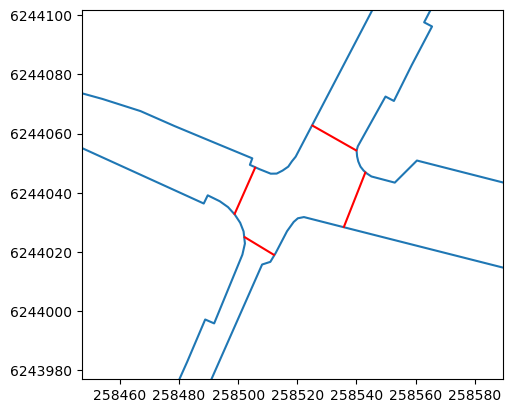

In [13]:
import geopandas as gpd

streets = gpd.read_file("../example_0/data/500/street_boundary_filled.geojson")
zebras = gpd.read_file("../example_0/data/500/crossing_lines.geojson")
extent = gpd.read_file("../example_0/data/extent_A3.geojson")

ax = streets.plot()
zebras.plot(ax=ax, color='r')
minx, miny, maxx, maxy = extent.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

because this location has no traffic islands, won't run the "split island" script. -> this is a manual decision for now.

next is the bus stop script and the building script

5. `04_point_overlay_bus.py` moves the bus stop away if the `overlay_pref` setting in the param is set to `displace`.
6. `06a_buildings.py` make generalization over the building patches

In [ ]:
%run 04_point_overlay_bus.py example_0
%run 06a_buildings.py example_0

and a little plot of the original building location / shape and the generalized location / shape: the building is retreating to maintain a gap with the sidewalk, the garden (green areas) "in" the buildings are not merged because they are big and not next to the street.

(6243976.917278784, 6244101.917278784)

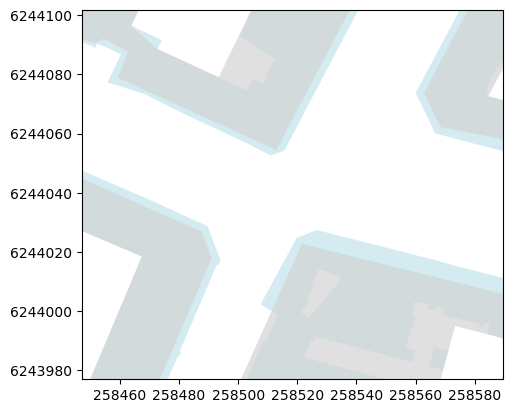

In [30]:
import geopandas as gpd

building_osm = gpd.read_file('../example_0/data/buildings.geojson')
building_gen = gpd.read_file('../example_0/data/500/buildings_gen.geojson')
extent = gpd.read_file("../example_0/data/extent_A3.geojson")

ax = building_osm.plot(color='lightblue', alpha=0.5)
building_gen.plot(ax=ax, color='lightgray', alpha=0.7)
minx, miny, maxx, maxy = extent.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

and because there is no green areas directly adjacent to the street, won't do that either. 

now produce the maps.

the styles and templates that are currently included.

![default styles](pics/style_samples.PNG)

template A5:
![a5 template](pics/templatea5.PNG)

template A4 and A3:
![a3 a4](pics/templatesa4.PNG)

first install the braille font. "Braille TBFr2007 IHS HEA thermo" is used here. it can be found at [here](http://natbraille.free.fr/ressources/fonts/BrailleTBFr2007INSHEAb_thermo.ttf) and in the `templates` folder.

then run the map assembly script `07_assembly.py` that will piece together the geometries and the styles into the template.

In [ ]:
# install fonts on this virtual machine
%mkdir ~/.local/share/fonts
%cp /home/jovyan/templates/BrailleTBFr2007INSHEAb_thermo.ttf  ~/.local/share/fonts/
%fc-cache -f -v

# run map assembly script
%run 07_assembly.py example_0

## and the map!

directly open the file from the left folder tree (`example_0/image/A3.pdf`) and check it in another tab.

or run the code in the next block to have it shown here.

In [ ]:
from IPython.display import Image
Image(filename='../example_0/image/A3.png')